In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Polynomial Regression and Overfitting

In [2]:
import numpy                as np
import sklearn.linear_model as lm

In this notebook we want to discuss both <em style="color:blue;">polynomial regression</em> and <em style="color:blue;">overfitting</em>.
One possible reason causing overfitting is a correlation between features.  Let us create a dataset with two feature `x1` and `x2` that are more or less the same. Actually, `x2` is `x1` plus some random noise.  The dependent variable `y` is the square root of `x1`.

In [3]:
np.random.seed(42)
N  = 20                     # number of data points
X1 = np.array([k for k in range(N)])
X2 = np.array([k + 0.2 * (np.random.rand() - 0.5) for k in range(N)])
Y  = np.sqrt(X1)            # Y is the square root of X1
X1 = np.reshape(X1, (N, 1)) # turn X1 into an N x 1 matrix
X2 = np.reshape(X2, (N, 1)) # turn X2 into an N x 1 matrix
X  = np.hstack([X1, X2])    # combine X1 and X2 into an N x 2 matrix
X

array([[ 0.        , -0.02509198],
       [ 1.        ,  1.09014286],
       [ 2.        ,  2.04639879],
       [ 3.        ,  3.0197317 ],
       [ 4.        ,  3.93120373],
       [ 5.        ,  4.9311989 ],
       [ 6.        ,  5.91161672],
       [ 7.        ,  7.07323523],
       [ 8.        ,  8.020223  ],
       [ 9.        ,  9.04161452],
       [10.        ,  9.9041169 ],
       [11.        , 11.09398197],
       [12.        , 12.06648853],
       [13.        , 12.94246782],
       [14.        , 13.93636499],
       [15.        , 14.9366809 ],
       [16.        , 15.96084845],
       [17.        , 17.00495129],
       [18.        , 17.986389  ],
       [19.        , 18.95824583]])

Let us plot the data.  We will use colors to distinguish between `x1` and `x2`.  The pairs $(x_1, y)$ are plotted in blue, while the pairs  $(x_2, y)$ are plotted in yellow.

In [4]:
import matplotlib.pyplot as plt
import seaborn           as sns

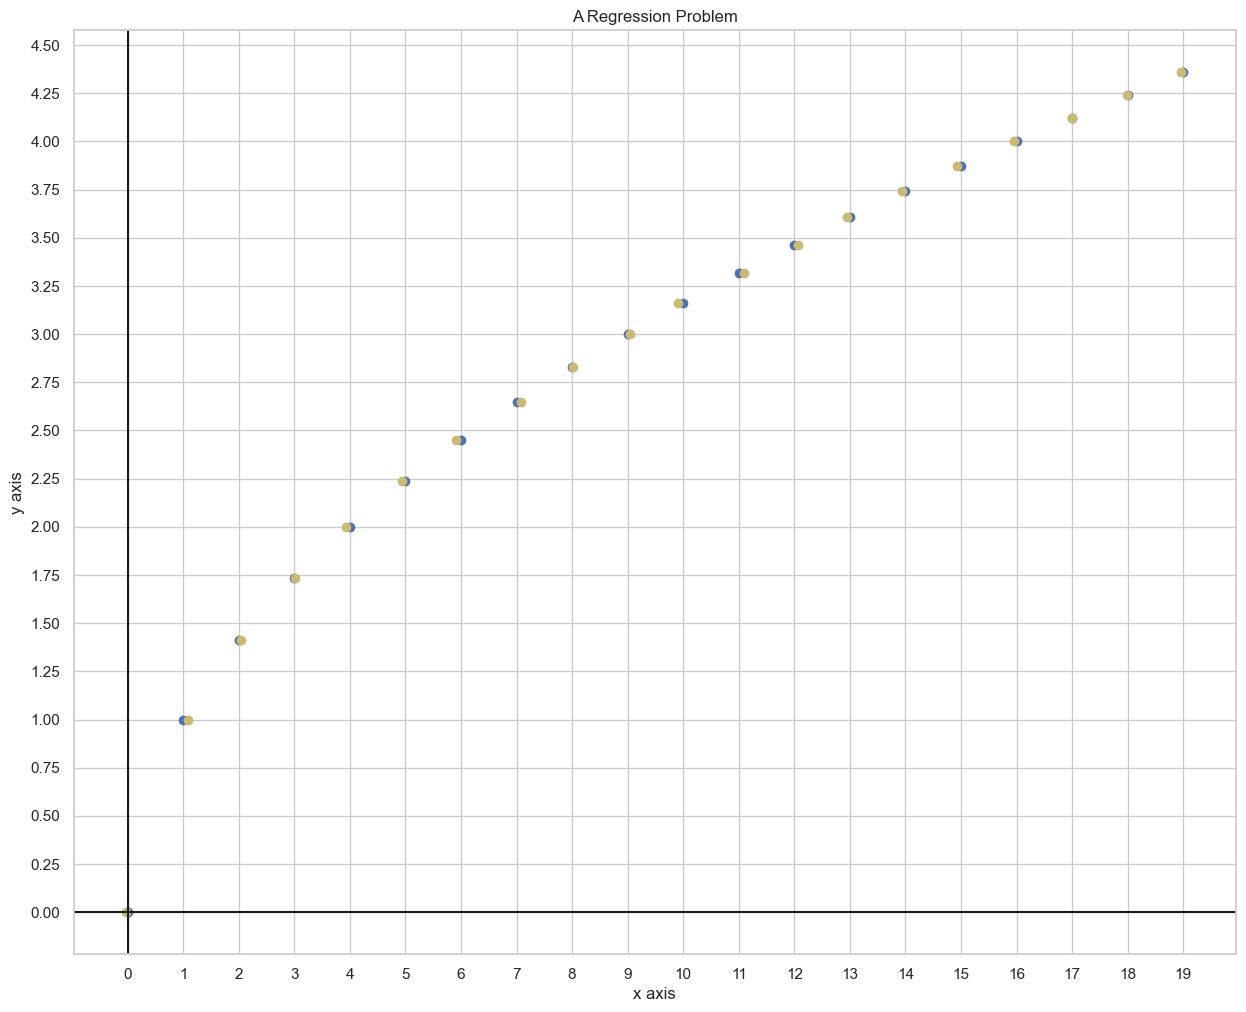

In [5]:
plt.figure(figsize=(15, 12))
sns.set(style='whitegrid')
plt.title('A Regression Problem')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xticks(np.arange(0.0, N, step=1.0))
plt.yticks(np.arange(0.0, np.sqrt(N) + 1, step=0.25))
plt.scatter(X1, Y, color='b') 
plt.scatter(X2, Y, color='y') 

We want to split the data into a <em style="color:blue;">training set</em> and a <em style="color:blue;">test set</em>.
The <em style="color:blue;">training set</em> will be used to compute the parameters of our model, while the
<em style="color:blue;">testing set</em> is only used to check the <em style="color:blue;">accuracy</em>.  SciKit-Learn has a predefined method
`sklearn.model_selection.train_test_split` that can be used to randomly split data into a training set and a test set.

In [6]:
from sklearn.model_selection import train_test_split

We will split the data at a ratio of $4:1$, i.e. $80\%$ of the data will be used for training, while the remaining $20\%$ is used to test the accuracy.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_test

array([[ 3.        ,  3.0197317 ],
       [16.        , 15.96084845],
       [ 6.        ,  5.91161672],
       [10.        ,  9.9041169 ]])

In order to build a <em style="color:blue;">linear regression</em> model, we import the module `linear_model` from SciKit-Learn.

The function $\texttt{linear_regression}(\texttt{X_train}, \texttt{Y_train}, \texttt{X_test}, \texttt{Y_test})$ takes a feature matrix $\texttt{X_train}$ and a corresponding vector $\texttt{Y_train}$ and computes a linear regression model $M$ that best fits these data.  Then, the explained variance of the model is computed both for the training set and for the test set.

In [8]:
def linear_regression(X_train, Y_train, X_test, Y_test):
    M = lm.LinearRegression()
    M.fit(X_train, Y_train)
    train_score = M.score(X_train, Y_train)
    test_score  = M.score(X_test , Y_test)
    return M, train_score, test_score

We use the function `linear_regression` to build a model for our data.  Note that this function uses only the <em style="color:blue;">training data</em> to create the model.  The <em style="color:blue;">test data</em> is only used for evaluating the model.

In [9]:
M, train_score, test_score = linear_regression(X_train, Y_train, X_test, Y_test)
train_score, test_score

(0.9332346543290914, 0.8832871139729291)

Notice that the explained variance is a lot worse on the test set. Let's plot the linear model. The coefficients are stored in `M.intercept_` and `M.coef_`.

In [10]:
ϑ0     = M.intercept_
ϑ1, ϑ2 = M.coef_

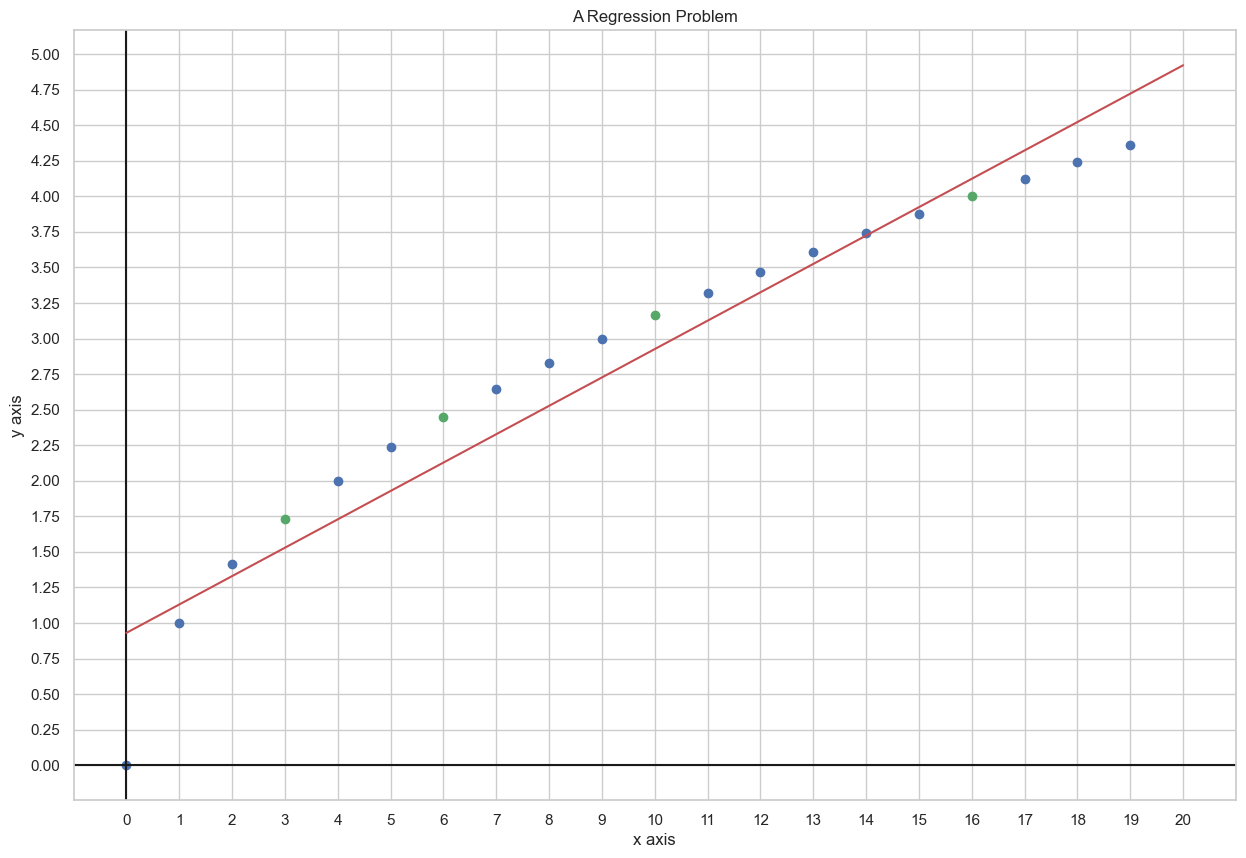

In [11]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')
plt.title('A Regression Problem')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xticks(np.arange(0.0, N + 1, step=1.0))
plt.yticks(np.arange(0.0, np.sqrt(N) + 1, step=0.25))
plt.scatter(X_train[:,0], Y_train, color='b') 
plt.scatter(X_test [:,0], Y_test , color='g') 
plt.plot([0, N], [ϑ0, ϑ0 + (ϑ1 + ϑ2) * N], c='r')
#plt.savefig('sqrt-linear.pdf')

In order to improve the explained variance of our model, we extend it with polynomial features, i.e. we add features like $x_1^2$ and $x_1\cdot x_2$ etc.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
quadratic = PolynomialFeatures(2, include_bias=False)

In [14]:
X_train_quadratic = quadratic.fit_transform(X_train)
X_test_quadratic  = quadratic.fit_transform(X_test)
quadratic.get_feature_names_out(['x1', 'x2'])

array(['x1', 'x2', 'x1^2', 'x1 x2', 'x2^2'], dtype=object)

In [15]:
X_test_quadratic

array([[  3.        ,   3.0197317 ,   9.        ,   9.05919509,
          9.11877952],
       [ 16.        ,  15.96084845, 256.        , 255.37357518,
        254.7486832 ],
       [  6.        ,   5.91161672,  36.        ,  35.46970033,
         34.94721227],
       [ 10.        ,   9.9041169 , 100.        ,  99.04116899,
         98.09153155]])

Let us fit this quadratic model.

In [16]:
M, train_score, test_score = linear_regression(X_train_quadratic, Y_train, X_test_quadratic, Y_test)
train_score, test_score

(0.9821582972662852, 0.9643289452316769)

The accuracy on the training set and on the test set have both increased.  Let us plot the model.

In [17]:
ϑ0                 = M.intercept_
ϑ1, ϑ2, ϑ3, ϑ4, ϑ5 = M.coef_

Plotting the regression curve starts to get tedious.

In [18]:
a = np.arange(0.0, N+1, 0.01)
b = ϑ0 + (ϑ1 + ϑ2 ) * a + (ϑ3 + ϑ4 + ϑ5) * a**2

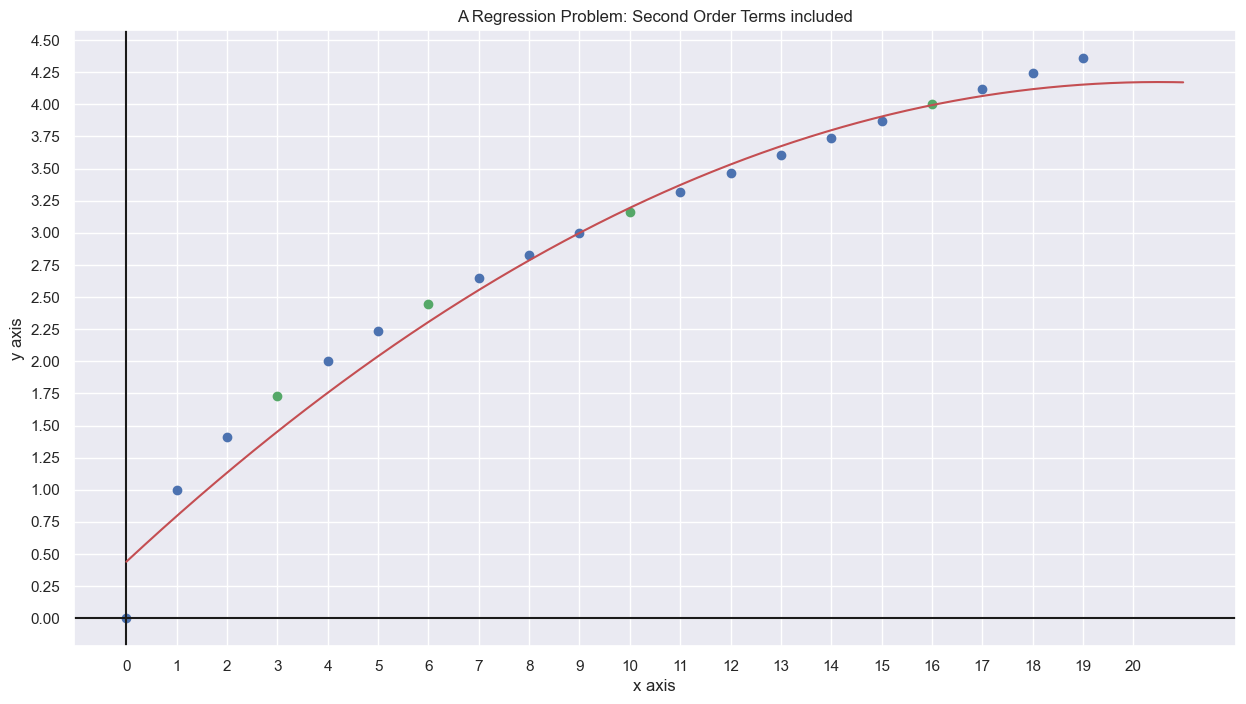

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='darkgrid')
plt.title('A Regression Problem: Second Order Terms included')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xticks(np.arange(0.0, N + 1, step=1.0))
plt.yticks(np.arange(0.0, np.sqrt(N) + 1, step=0.25))
plt.scatter(X_train[:,0], Y_train, color='b') 
plt.scatter(X_test [:,0], Y_test , color='g') 
plt.plot(a, b, c='r')
#plt.savefig('sqrt-quadratic.pdf')

Obviously, the quadratic curve is a much better match than the linear model. Let's try to use higher order polynomials. 

$\texttt{polynomial}(n)$ creates a polynomial in the variables `a` and `b` that contains all terms of the form 
that contains all terms of the form $\Theta[k] \cdot a^i \cdot b^j$ where $i+j \leq n$.

In [20]:
def polynomial(n):
    sum = '   Θ[0]' 
    cnt = 0
    for k in range(1, n+1):
        for i in range(0, k+1):
            cnt += 1
            sum += f' + Θ[{cnt}] * a**{k-i} * b**{i}'
        if k < n:
            sum += '\\\n'
    return sum

Let's check this out for $n=4$.

In [21]:
print(polynomial(4))

   Θ[0] + Θ[1] * a**1 * b**0 + Θ[2] * a**0 * b**1\
 + Θ[3] * a**2 * b**0 + Θ[4] * a**1 * b**1 + Θ[5] * a**0 * b**2\
 + Θ[6] * a**3 * b**0 + Θ[7] * a**2 * b**1 + Θ[8] * a**1 * b**2 + Θ[9] * a**0 * b**3\
 + Θ[10] * a**4 * b**0 + Θ[11] * a**3 * b**1 + Θ[12] * a**2 * b**2 + Θ[13] * a**1 * b**3 + Θ[14] * a**0 * b**4


The function $\texttt{polynomial_vector}(n, M)$ takes a number $n$ and a model $M$.  It returns a pair of vectors that can be used to plot the nonlinear model.

In [22]:
def polynomial_vector(n, M):
    Θ = [M.intercept_] + list(M.coef_)
    a = np.reshape(X1, (N, ))
    b = np.reshape(X2, (N, ))
    return 0.5*(a + b), eval(polynomial(n))

The function $\texttt{plot_nth_degree_boundary}(n)$ creates a polynomial regression model of degree $n$.  It plots both the data and the polynomial model.

In [23]:
def plot_nth_degree_polynomial(n):
    poly         = PolynomialFeatures(n, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.fit_transform(X_test)
    M, s1, s2    = linear_regression(X_train_poly, Y_train, X_test_poly, Y_test)
    print('The explained variance on the training set is:', s1)
    print('The explained variance on the test     set is:', s2)
    a, b = polynomial_vector(n, M)
    plt.figure(figsize=(15, 10))
    sns.set(style='darkgrid')
    plt.title('A Regression Problem')
    plt.axvline(x=0.0, c='k')
    plt.axhline(y=0.0, c='k')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.xticks(np.arange(0.0, N + 1, step=1.0))
    plt.yticks(np.arange(0.0, 2*np.sqrt(N), step=0.25))
    plt.scatter(X_train[:,0], Y_train, color='b') 
    plt.scatter(X_test [:,0], Y_test , color='g') 
    plt.plot(a, b, c='r')
    #plt.savefig('sqrt-' + str(n) + '.pdf')

Let us test this for the polynomial logistic regression model of degree $4$.

The explained variance on the training set is: 0.9999995193895728
The explained variance on the test     set is: 0.9625301628834139


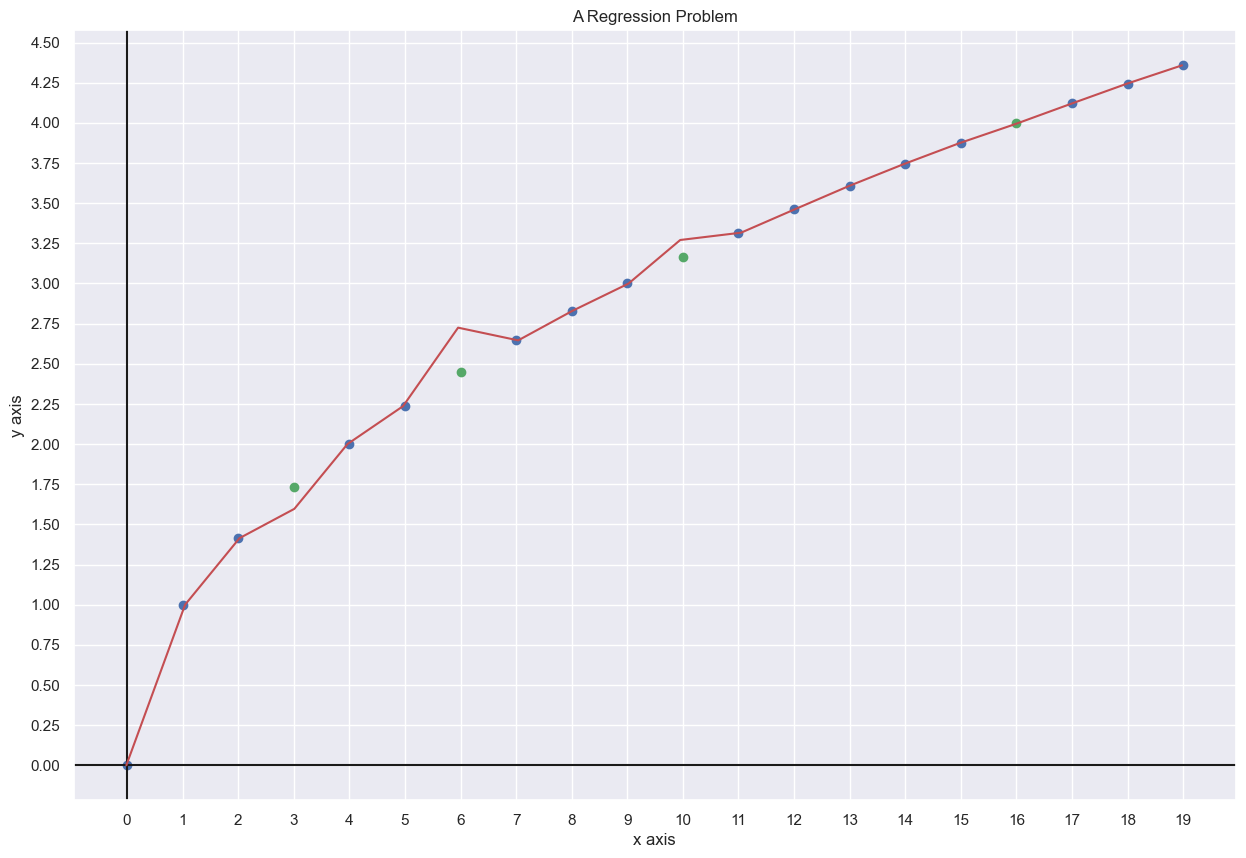

In [24]:
plot_nth_degree_polynomial(4)

This seems to be working and the explained variance has improved. Let's try to use even higher order polynomials.  Hopefully, we can get a $100\%$ explained variance.

The explained variance on the training set is: 1.0
The explained variance on the test     set is: 0.8661638901285876


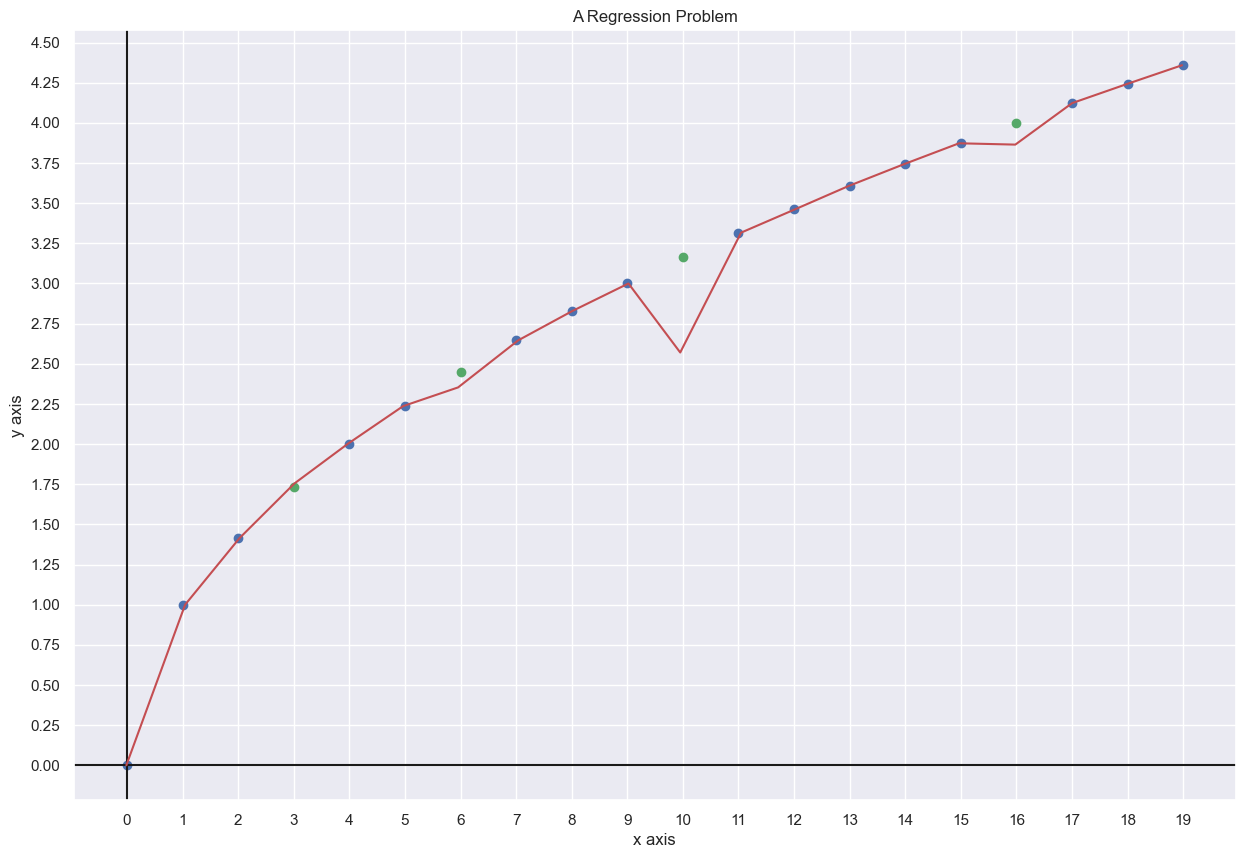

In [25]:
plot_nth_degree_polynomial(6)

It turns out that we can get $100\%$ of explained variance, but only for the training set.  The explained variance of the test set has decreased and apparently the curve is starting to get wiggly.

## Ridge Regression

In [ ]:
def ridge_regression(X_train, Y_train, X_test, Y_test, alpha):
    M = lm.Ridge(alpha, solver='svd')
    M.fit(X_train, Y_train)
    train_score = M.score(X_train, Y_train)
    test_score  = M.score(X_test , Y_test)
    return M, train_score, test_score

In [ ]:
def plot_nth_degree_polynomial_ridge(n, alpha):
    poly         = PolynomialFeatures(n, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.fit_transform(X_test)
    M, s1, s2    = ridge_regression(X_train_poly, Y_train, X_test_poly, Y_test, alpha)
    print('The explained variance on the training set is:', s1)
    print('The explained variance on the test     set is:', s2)
    a, b = polynomial_vector(n, M)
    plt.figure(figsize=(15, 10))
    sns.set(style='darkgrid')
    plt.title('A Regression Problem')
    plt.axvline(x=0.0, c='k')
    plt.axhline(y=0.0, c='k')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.xticks(np.arange(0.0, N + 1, step=1.0))
    plt.yticks(np.arange(0.0, 2*np.sqrt(N), step=0.25))
    plt.scatter(X_train[:,0], Y_train, color='b') 
    plt.scatter(X_test [:,0], Y_test , color='g') 
    plt.plot(a, b, c='r')
    #plt.savefig('sqrt-' + str(n) + 'ridge.pdf')

Let's try to use a polynomial of degree 6 but without regularization.

In [ ]:
plot_nth_degree_polynomial_ridge(6, 0.0)

This looks like the model that we had found before.  Let us try to add a bit of regularization.

In [ ]:
plot_nth_degree_polynomial_ridge(6, 0.05)

Now the model is much smoother and the explained variance has also increased considerably on the test set.

In [ ]:
plot_nth_degree_polynomial_ridge(6, 100000)

If we increase the regularization parameter too much, the model is no longer able to fit the data and the explained variance decreases.